# Exploratory Data Analysis
#### Preprocessed dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="Set2", color_codes=True)

In [2]:
# Read the preprocessed data
import os

file_path = os.path.join('..', 'data', 'csvs', 'pre_processed.csv')
df = pd.read_csv(file_path)
df.head()

,text,label
0,katia abreu diz vai colocar expulsao moldura n...,fake
1,ray peita bolsonaro conservador fake entrevist...,fake
2,reinaldo azevedo desmascarado policia federal ...,fake
3,relatorio assustador bndes mostra dinheiro pub...,fake
4,radialista americano fala sobre pt vendem ilus...,fake


In [3]:
# Split into fake and true news
fake_df = df[df["label"] == 'fake']
true_df = df[df["label"] == 'true']

In [4]:
# Create bag of words for each df
from sklearn.feature_extraction.text import CountVectorizer

fake_bag = CountVectorizer().fit(fake_df["text"])
true_bag = CountVectorizer().fit(true_df["text"])
fake_bag = fake_bag.vocabulary_
true_bag = true_bag.vocabulary_

In [5]:
# Create a bag of words with the difference between the two

# Get all words from both bags
all_words = set(list(fake_bag.keys()) + list(true_bag.keys()))

bag = {}
for word in all_words:
    if word in fake_bag and word in true_bag:
        bag[word] = true_bag[word] - fake_bag[word]
    elif word in fake_bag:
        bag[word] = -fake_bag[word]
    else:
        bag[word] = true_bag[word]


In [6]:
worst_to_best = sorted(bag.items(), key= lambda x: x[1])

print(f"worst word: {worst_to_best[0]}")
print(f"best word: {worst_to_best[-1]}")

worst word: ('zulu', -31742)
best word: ('zygmunt', 74421)


Text(0.5, 0.98, 'Antes da normalização')

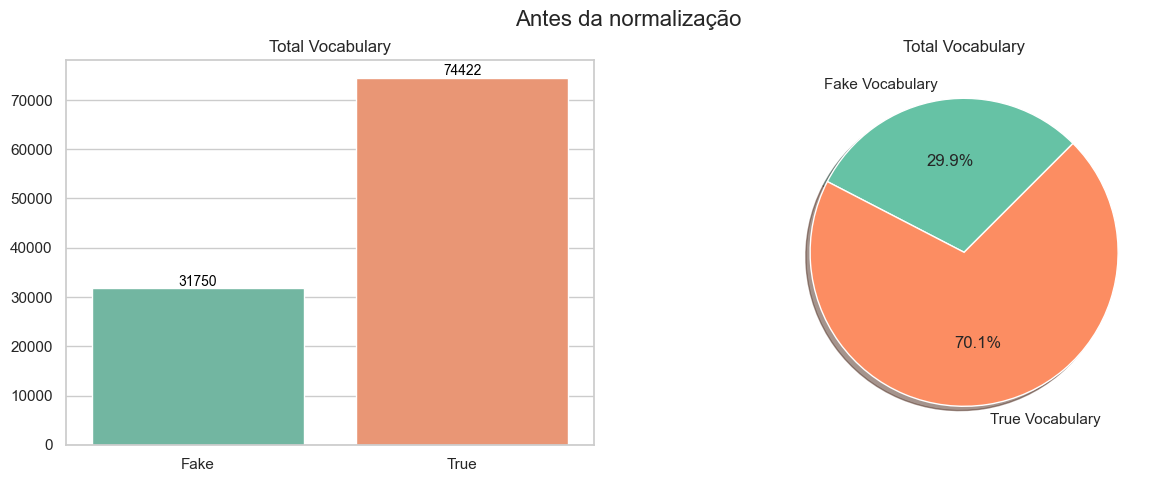

In [13]:
# Total vacubulary for each bag
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes = axes.ravel()
sns.barplot(x=["Fake", "True"], y=[len(fake_bag), len(true_bag)], ax = axes[0])
axes[0].bar_label(axes[0].containers[0], label_type='edge', fmt='%d', color='black', size=10)
axes[0].title.set_text("Total Vocabulary")


axes[1].pie([len(fake_bag), len(true_bag)], labels=["Fake Vocabulary", "True Vocabulary"], autopct='%1.1f%%', shadow=True, startangle= 45)
axes[1].title.set_text("Total Vocabulary")

#fig.tight_layout()
fig.suptitle('Antes da normalização', fontsize=16)

Text(0.5, 0.98, 'Antes da normalização')

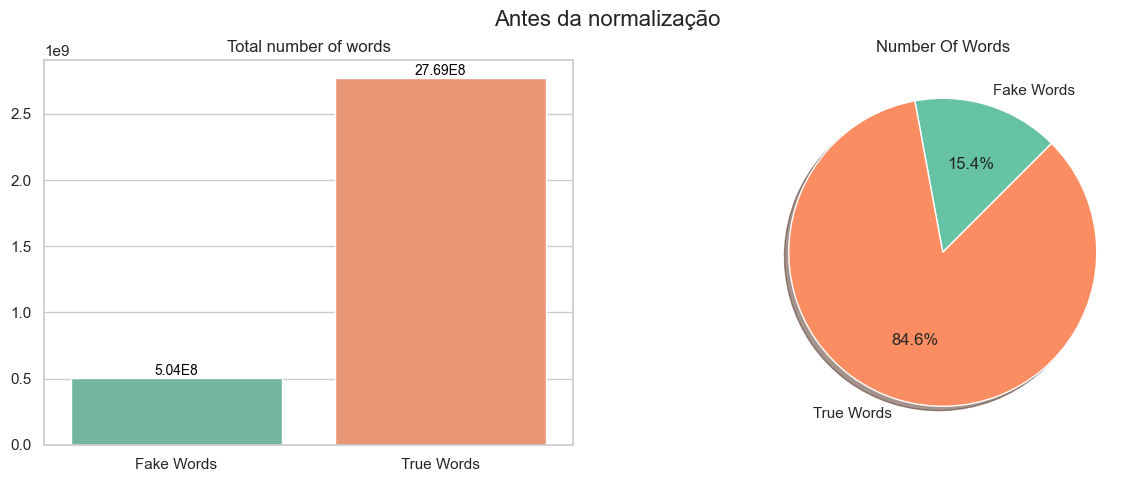

In [14]:
numberOfFakeWords = sum(fake_bag.values())
numberOfTrueWords = sum(true_bag.values())
numberOfWords = numberOfFakeWords + numberOfTrueWords

def my_fmt(x):
    return f"{x/10**8:.2f}E8"

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes = axes.ravel()
sns.barplot(x=["Fake Words", "True Words"], y=[numberOfFakeWords, numberOfTrueWords], ax = axes[0])
axes[0].bar_label(axes[0].containers[0], label_type='edge', fmt= my_fmt, color='black', size=10)
axes[0].title.set_text("Total number of words")


axes[1].pie([numberOfFakeWords, numberOfTrueWords], labels=["Fake Words", "True Words"], autopct='%1.1f%%', shadow=True, startangle= 45)
axes[1].title.set_text("Number Of Words")


fig.suptitle('Antes da normalização', fontsize=16)

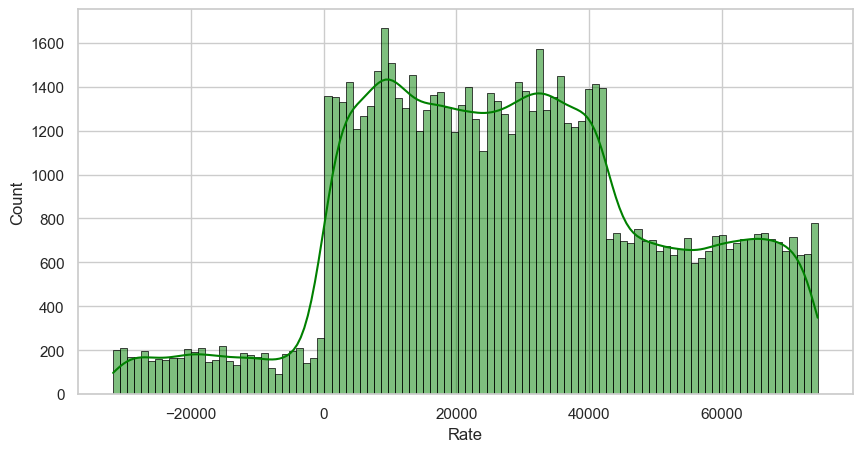

In [9]:
distribution_df = pd.DataFrame(bag.values(), columns=["Rate"])
distribution_df

# Create a histogram of the distribution
plt.figure(figsize=(10,5))
sns.histplot(distribution_df["Rate"], bins=100, kde=True, linewidth=0.5, edgecolor="black", color="green")
plt.show()

In [10]:
normalized_fake_bag = {}
for word in fake_bag:
    normalized_fake_bag[word] = fake_bag[word] / numberOfFakeWords

normalized_true_bag = {}
for word in true_bag:
    normalized_true_bag[word] = true_bag[word] / numberOfTrueWords

normalized_bag = {}
for word in all_words:
    if word in normalized_fake_bag and word in normalized_true_bag:
        normalized_bag[word] = normalized_true_bag[word] - normalized_fake_bag[word]
    elif word in fake_bag:
        normalized_bag[word] = -normalized_fake_bag[word]
    else:
        normalized_bag[word] = normalized_true_bag[word]

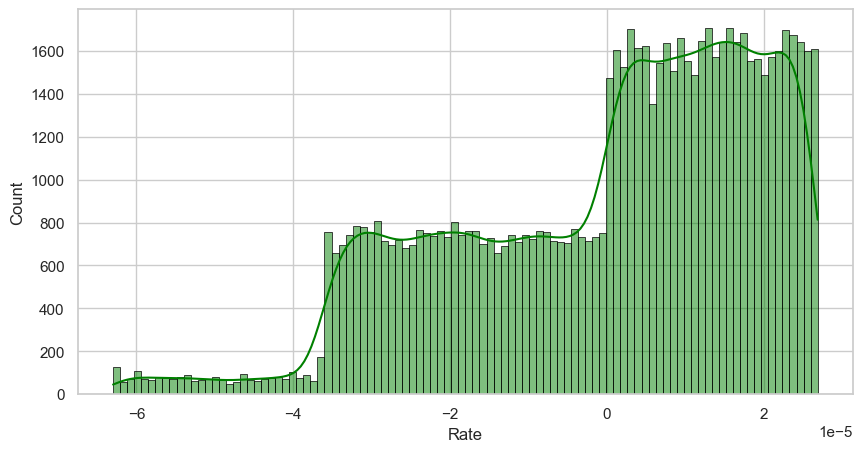

In [11]:
distribution_df = pd.DataFrame(normalized_bag.items(), columns=["Word", "Rate"])
distribution_df

# Create a histogram of the distribution
plt.figure(figsize=(10,5))
sns.histplot(distribution_df["Rate"], bins=100, kde=True, linewidth=0.5, edgecolor="black", color="green")
plt.show()